In [37]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from patsy.highlevel import dmatrices

# Load data
df = pd.read_csv('Data-GP1.csv')
df

,Mon,Tue,Wed,Thu,Date,Stormy,Mixed,p,q,Rainy,Cold,Wind
0,1,0,0,0,911202,1,0,-0.430783,8.994421,1,0,2.995732
1,0,1,0,0,911203,1,0,0.000000,7.707063,0,0,2.995732
2,0,0,1,0,911204,0,1,0.072321,8.350194,1,1,2.813411
3,0,0,0,1,911205,1,0,0.247139,8.656955,0,1,3.036554
4,0,0,0,0,911206,1,0,0.664327,7.844241,0,1,3.036554
...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,0,0,0,920504,0,0,-0.798508,8.610683,0,0,2.862201
107,0,1,0,0,920505,0,1,-0.087011,7.162397,0,0,2.908721
108,0,0,1,0,920506,0,1,0.184922,7.362010,0,0,2.862201
109,0,0,0,1,920507,0,1,0.223143,8.764053,0,0,2.813411


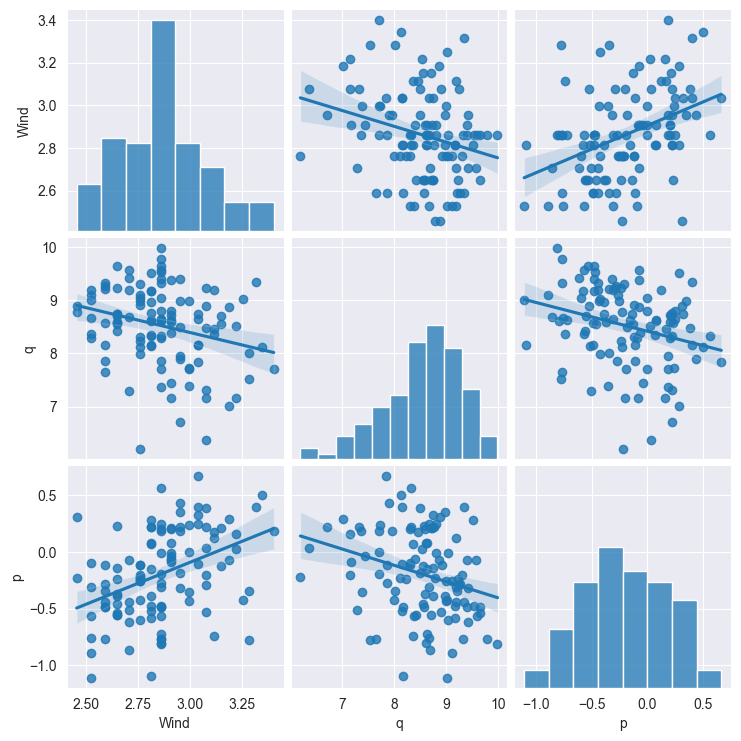

In [38]:
sns.pairplot(df[['Wind', 'q', 'p']], kind = 'reg')

In [39]:
df.corr()

,Mon,Tue,Wed,Thu,Date,Stormy,Mixed,p,q,Rainy,Cold,Wind
Mon,1.000000,-0.246951,-0.233333,-0.246951,-0.060778,0.098818,-0.121380,-0.074936,0.156964,-0.025299,0.018651,0.165220
Tue,-0.246951,1.000000,-0.246951,-0.261364,-0.036667,0.018126,0.046049,-0.018483,-0.218871,-0.104308,0.062080,0.117045
Wed,-0.233333,-0.246951,1.000000,-0.246951,0.057674,-0.053526,0.128124,-0.009366,-0.234749,0.037105,0.064657,-0.045354
Thu,-0.246951,-0.261364,-0.246951,1.000000,0.019542,-0.030946,-0.002172,0.083350,0.165607,-0.044005,-0.026835,-0.119755
Date,-0.060778,-0.036667,0.057674,0.019542,1.000000,-0.159531,0.021537,-0.244170,-0.066379,-0.102542,-0.168876,-0.186811
Stormy,0.098818,0.018126,-0.053526,-0.030946,-0.159531,1.000000,-0.422917,0.399417,-0.222636,0.097708,0.392061,0.753123
Mixed,-0.121380,0.046049,0.128124,-0.002172,0.021537,-0.422917,1.000000,0.065993,-0.008908,-0.080250,-0.084166,-0.046567
p,-0.074936,-0.018483,-0.009366,0.083350,-0.244170,0.399417,0.065993,1.000000,-0.278530,0.036653,0.241886,0.405123
q,0.156964,-0.218871,-0.234749,0.165607,-0.066379,-0.222636,-0.008908,-0.278530,1.000000,0.033979,-0.142820,-0.263995
Rainy,-0.025299,-0.104308,0.037105,-0.044005,-0.102542,0.097708,-0.080250,0.036653,0.033979,1.000000,0.093805,0.065632


In [40]:
# Function Section

def get_dataframe(dataframe, target, fields):
    """Create a new dataframe from given fields.
    :param dataframe: source dataframe
    :param target: target field
    :param fields: instrumental fields

    :return y: Target X: Instrumental Variables
    """
    return dmatrices(target + ' ~ ' + ' + '.join(fields), data=dataframe, return_type='dataframe')

# Example:
y, X = get_dataframe(df, 'p', ['Stormy', 'Mixed'])

def model_fit(target, fields):
    """Fit the model using given params.
    :param target: target field
    :param fields: instrumental fields

    :return result: fitted result
    """
    return sm.OLS(target, fields).fit()

# Example:
res = model_fit(y, X)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     15.83
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           9.32e-07
Time:                        13:36:25   Log-Likelihood:                -35.891
No. Observations:                 111   AIC:                             77.78
Df Residuals:                     108   BIC:                             85.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3919      0.051     -7.756      0.000      -0.492      -0.292
Stormy         0.4368      0.078      5.573      0.000       0.281       0.592
Mixed          0.2360      0.077      3.064      0.003       0.083       0.389
==============================================================================
Omnibus:                        1.882   Durbin-Watson:                   0.693
Prob(Omnibus):                  0.390   Jarque-Bera (JB):                1.609
Skew:                          -0.294   Prob(JB):                        0.447
Kurtosis:                       3.032   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Just a demo
# Assume q = b1 p + u1
# Reduced Form : p = b2 rainy + b3 cold + b4 wind + u2
y1, X = get_dataframe(df, 'p', ['Rainy', 'Cold', 'Wind'])

# Get reduced model
y1_fitted_result = model_fit(y1, X)
y1_hat = y1_fitted_result.fittedvalues

# Use y_hat to get structural model
# q = b5 y_hat + u3

structural_fitted_result = model_fit(df['q'], y1_hat)
y1_fitted_result.summary()
# We can see Rainy and Cold's pValue is significant, so we better find other para. However, the pValue for Wind is less
# than 0.05, then F -statistic is significant.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     7.232
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           0.000183
Time:                        13:36:25   Log-Likelihood:                -39.914
No. Observations:                 111   AIC:                             87.83
Df Residuals:                     107   BIC:                             98.67
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1693      0.503     -4.316      0.000      -3.166      -1.173
Rainy          0.0055      0.091      0.060      0.952      -0.176       0.187
Cold           0.0564      0.075      0.750      0.455      -0.093       0.206
Wind           0.6799      0.181      3.761      0.000       0.321       1.038
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.635
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.172
Skew:                          -0.223   Prob(JB):                        0.557
Kurtosis:                       2.765   Cond. No.                         49.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# For the Hausman test
# y = β0 + β1y1 + γ1z1 + ηv1 + u1

hat_v = y1_fitted_result.resid
hat_v.name = 'v'
new_structural_eq = pd.concat([df['p'],hat_v], axis=1)

hausman_structural_fitted_result = model_fit(df['q'], new_structural_eq)
hausman_structural_fitted_result.summary()

# check the significance of ˆη: If the coefficient is statistically different from
# zero (p-value is less than 0.05), then y1 is endogenous and we have to use
# 2SLS.

hat_u = hausman_structural_fitted_result.resid
Z = df[['Mon', 'Tue', 'Wed']]
sargan_fitted_result = model_fit(hat_u, Z)

# where stats is imported from the scipy package. If the χ2 statistics is not
# significant (p-value is greater than 0.05) then we can use the instruments;
# otherwise we need to find a better instrument variable(s).
N = 3 # I'm not sure... ???
p_value = 1 - stats.chi2.cdf(N * sargan_fitted_result.rsquared, 1)
p_value

0.32685251520795966

In [43]:
# FYI

y, X = dmatrices('p ~ Mon + Tue + Wed + Thu + Date + Stormy + Mixed + Rainy + Cold + Wind', data=df, return_type='dataframe')
y1 = sm.OLS(y, X)

res = y1.fit()
print(res.summary())

hat_y1 = res.fittedvalues

res.resid

                            OLS Regression Results                            
Dep. Variable:                      p   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     3.948
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           0.000149
Time:                        13:36:25   Log-Likelihood:                -31.696
No. Observations:                 111   AIC:                             85.39
Df Residuals:                     100   BIC:                             115.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.9273      8.649      1.842      0.0

0     -0.442771
1     -0.079593
2      0.106257
3     -0.005551
4      0.447357
         ...   
106   -0.312230
107    0.151440
108    0.392471
109    0.352048
110    0.715744
Length: 111, dtype: float64